# UCI ML Arrhythmia Dataset - Deep Learning Model

https://archive.ics.uci.edu/ml/datasets/Arrhythmia

Wikipedia page describing different arrhythmias

https://en.wikipedia.org/wiki/Arrhythmia

In [32]:
from IPython.display import Image




#Image(dirpath + '/12_lead_generated_ventricular_tachycardia.jpg', width=1000, height=800)

In [33]:
#List of arrhythmias - copied from the data description
#Class code:    Class:                                       Number of instances:
#01             Normal                                       245
#02             Ischemic changes (Coronary Artery Disease)   44
#03             Old Anterior Myocardial Infarction           15
#04             Old Inferior Myocardial Infarction           15
#05             Sinus tachycardy                             13
#06             Sinus bradycardy                             25
#07             Ventricular Premature Contraction (PVC)      3
#08             Supraventricular Premature Contraction       2
#09             Left bundle branch block                     9
#10             Right bundle branch block                    50
#11             1. degree AtrioVentricular block             0
#12             2. degree AV block                           0
#13             3. degree AV block                           0
#14             Left ventricule hypertrophy                  4
#15             Atrial Fibrillation or Flutter               5
#16             Others                                       22

# NOTE incredibly imbalanced data set - and that classes 11, 12 and 13 have ZERO exemplars!!!

# 245 normal cardiac rhythm exemplars and a total of 208 arrhythmia exemplars - almost better as a binary normal / not normal 
# problem

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import tensorflow as tf

import keras
import keras.backend as K

from keras.models import Model
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout

from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

from keras import regularizers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [35]:
import pandas as pd
import numpy as np
import requests

# The is_online() function uses the requests library to make a simple GET request to a well-known website (in this case, the UCI Machine Learning Repository) with a timeout of 5 seconds. If the request succeeds and returns a status code of 200, it means the machine is online. Otherwise, it assumes the machine is offline and reads the data from the local Excel file.
def is_online():
    try:
        response = requests.get("http://archive.ics.uci.edu", timeout=5)
        return response.status_code == 200
    except requests.ConnectionError:
        return False

# Check if the machine is online or offline
if is_online():
    wifi = 'online'
else:
    wifi = 'offline'

if wifi == 'online':
    # after doing datacamp intermediate importing data in python
    url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'
    df = pd.read_csv(url, header=None)
else:
    dirpath = r'C:\Users\user\ML\arrhythmia'
    df = pd.read_excel(dirpath + '/arrhythmia.data.xlsx')

# 'missing' data is expressed as a '?' symbol - replace with 0
df = df.replace(to_replace='?', value=0)

print(wifi)

online


In [53]:
new_headings = [ "Age",
                "Sex",
                "Height",
                "Weight",
                "QRS_duration",
                "P-R_interval",
                "Q-T_interval",
                "T_interval",
                "P_interval",
                "QRS_vector_angle",
                "T_vector_angle",
                "P_vector_angle",
                "QRST_vector_angle",
                "J_vector_angle",
                "Heart_rate",
                "DI_Q_wave",
                "DI_R_wave",
                "DI_S_wave",
                "DI_R'_wave",
                "DI_S'_wave",
                "DI_Number_of_intrinsic_deflections",
                "DI_Existence_of_ragged_R_wave",
                "DI_Existence_of_diphasic_derivation_of_R_wave",
                "DI_Existence_of_ragged_P_wave",
                "DI_Existence_of_diphasic_derivation_of_P_wave",
                "DI_Existence_of_ragged_T_wave",
                "DI_Existence_of_diphasic_derivation_of_T_wave",
                
                "DII_Q_wave",
                "DII_R_wave",
                "DII_S_wave",
                "DII_R'_wave",
                "DII_S'_wave",
                "DII_Number_of_intrinsic_deflections",
                "DII_Existence_of_ragged_R_wave",
                "DII_Existence_of_diphasic_derivation_of_R_wave",
                "DII_Existence_of_ragged_P_wave",
                "DII_Existence_of_diphasic_derivation_of_P_wave",
                "DII_Existence_of_ragged_T_wave",
                "DII_Existence_of_diphasic_derivation_of_T_wave",
                
                "DIII_Q_wave",
                "DIII_R_wave",
                "DIII_S_wave",
                "DIII_R'_wave",
                "DIII_S'_wave",
                "DIII_Number_of_intrinsic_deflections",
                "DIII_Existence_of_ragged_R_wave",
                "DIII_Existence_of_diphasic_derivation_of_R_wave",
                "DIII_Existence_of_ragged_P_wave",
                "DIII_Existence_of_diphasic_derivation_of_P_wave",
                "DIII_Existence_of_ragged_T_wave",
                "DIII_Existence_of_diphasic_derivation_of_T_wave",
                
                "AVR_Q_wave",
                "AVR_R_wave",
                "AVR_S_wave",
                "AVR_R'_wave",
                "AVR_S'_wave",
                "AVR_Number_of_intrinsic_deflections",
                "AVR_Existence_of_ragged_R_wave",
                "AVR_Existence_of_diphasic_derivation_of_R_wave",
                "AVR_Existence_of_ragged_P_wave",
                "AVR_Existence_of_diphasic_derivation_of_P_wave",
                "AVR_Existence_of_ragged_T_wave",
                "AVR_Existence_of_diphasic_derivation_of_T_wave",
                
                "AVL_Q_wave",
                "AVL_R_wave",
                "AVL_S_wave",
                "AVL_R'_wave",
                "AVL_S'_wave",
                "AVL_Number_of_intrinsic_deflections",
                "AVL_Existence_of_ragged_R_wave",
                "AVL_Existence_of_diphasic_derivation_of_R_wave",
                "AVL_Existence_of_ragged_P_wave",
                "AVL_Existence_of_diphasic_derivation_of_P_wave",
                "AVL_Existence_of_ragged_T_wave",
                "AVL_Existence_of_diphasic_derivation_of_T_wave",
                
                "AVF_Q_wave",
                "AVF_R_wave",
                "AVF_S_wave",
                "AVF_R'_wave",
                "AVF_S'_wave",
                "AVF_Number_of_intrinsic_deflections",
                "AVF_Existence_of_ragged_R_wave",
                "AVF_Existence_of_diphasic_derivation_of_R_wave",
                "AVF_Existence_of_ragged_P_wave",
                "AVF_Existence_of_diphasic_derivation_of_P_wave",
                "AVF_Existence_of_ragged_T_wave",
                "AVF_Existence_of_diphasic_derivation_of_T_wave",   
                
                "V1_Q_wave",
                "V1_R_wave",
                "V1_S_wave",
                "V1_R'_wave",
                "V1_S'_wave",
                "V1_Number_of_intrinsic_deflections",
                "V1_Existence_of_ragged_R_wave",
                "V1_Existence_of_diphasic_derivation_of_R_wave",
                "V1_Existence_of_ragged_P_wave",
                "V1_Existence_of_diphasic_derivation_of_P_wave",
                "V1_Existence_of_ragged_T_wave",
                "V1_Existence_of_diphasic_derivation_of_T_wave",                   
                
                "V2_Q_wave",
                "V2_R_wave",
                "V2_S_wave",
                "V2_R'_wave",
                "V2_S'_wave",
                "V2_Number_of_intrinsic_deflections",
                "V2_Existence_of_ragged_R_wave",
                "V2_Existence_of_diphasic_derivation_of_R_wave",
                "V2_Existence_of_ragged_P_wave",
                "V2_Existence_of_diphasic_derivation_of_P_wave",
                "V2_Existence_of_ragged_T_wave",
                "V2_Existence_of_diphasic_derivation_of_T_wave",                  
                
                "V3_Q_wave",
                "V3_R_wave",
                "V3_S_wave",
                "V3_R'_wave",
                "V3_S'_wave",
                "V3_Number_of_intrinsic_deflections",
                "V3_Existence_of_ragged_R_wave",
                "V3_Existence_of_diphasic_derivation_of_R_wave",
                "V3_Existence_of_ragged_P_wave",
                "V3_Existence_of_diphasic_derivation_of_P_wave",
                "V3_Existence_of_ragged_T_wave",
                "V3_Existence_of_diphasic_derivation_of_T_wave",                   
                
                "V4_Q_wave",
                "V4_R_wave",
                "V4_S_wave",
                "V4_R'_wave",
                "V4_S'_wave",
                "V4_Number_of_intrinsic_deflections",
                "V4_Existence_of_ragged_R_wave",
                "V4_Existence_of_diphasic_derivation_of_R_wave",
                "V4_Existence_of_ragged_P_wave",
                "V4_Existence_of_diphasic_derivation_of_P_wave",
                "V4_Existence_of_ragged_T_wave",
                "V4_Existence_of_diphasic_derivation_of_T_wave",  
                
                "V5_Q_wave",
                "V5_R_wave",
                "V5_S_wave",
                "V5_R'_wave",
                "V5_S'_wave",
                "V5_Number_of_intrinsic_deflections",
                "V5_Existence_of_ragged_R_wave",
                "V5_Existence_of_diphasic_derivation_of_R_wave",
                "V5_Existence_of_ragged_P_wave",
                "V5_Existence_of_diphasic_derivation_of_P_wave",
                "V5_Existence_of_ragged_T_wave",
                "V5_Existence_of_diphasic_derivation_of_T_wave",                   
                
                "V6_Q_wave",
                "V6_R_wave",
                "V6_S_wave",
                "V6_R'_wave",
                "V6_S'_wave",
                "V6_Number_of_intrinsic_deflections",
                "V6_Existence_of_ragged_R_wave",
                "V6_Existence_of_diphasic_derivation_of_R_wave",
                "V6_Existence_of_ragged_P_wave",
                "V6_Existence_of_diphasic_derivation_of_P_wave",
                "V6_Existence_of_ragged_T_wave",
                "V6_Existence_of_diphasic_derivation_of_T_wave",  
                
                "DI_Amplitude_JJ",
                "DI_Amplitude_Q",
                "DI_Amplitude_R",
                "DI_Amplitude_S",
                "DI_Amplitude_R'",
                "DI_Amplitude_S'",
                "DI_Amplitude_P",
                "DI_Amplitude_T",
                "DI_Amplitude_QRSA",
                "DI_Amplitude_QRSTA",
                
                "DII_Amplitude_JJ",
                "DII_Amplitude_Q",
                "DII_Amplitude_R",
                "DII_Amplitude_S",
                "DII_Amplitude_R'",
                "DII_Amplitude_S'",
                "DII_Amplitude_P",
                "DII_Amplitude_T",
                "DII_Amplitude_QRSA",
                "DII_Amplitude_QRSTA",

                "DIII_Amplitude_JJ",
                "DIII_Amplitude_Q",
                "DIII_Amplitude_R",
                "DIII_Amplitude_S",
                "DIII_Amplitude_R'",
                "DIII_Amplitude_S'",
                "DIII_Amplitude_P",
                "DIII_Amplitude_T",
                "DIII_Amplitude_QRSA",
                "DIII_Amplitude_QRSTA",
                
                "AVR_Amplitude_JJ",
                "AVR_Amplitude_Q",
                "AVR_Amplitude_R",
                "AVR_Amplitude_S",
                "AVR_Amplitude_R'",
                "AVR_Amplitude_S'",
                "AVR_Amplitude_P",
                "AVR_Amplitude_T",
                "AVR_Amplitude_QRSA",
                "AVR_Amplitude_QRSTA",                
                
                "AVL_Amplitude_JJ",
                "AVL_Amplitude_Q",
                "AVL_Amplitude_R",
                "AVL_Amplitude_S",
                "AVL_Amplitude_R'",
                "AVL_Amplitude_S'",
                "AVL_Amplitude_P",
                "AVL_Amplitude_T",
                "AVL_Amplitude_QRSA",
                "AVL_Amplitude_QRSTA",       
                
                "AVF_Amplitude_JJ",
                "AVF_Amplitude_Q",
                "AVF_Amplitude_R",
                "AVF_Amplitude_S",
                "AVF_Amplitude_R'",
                "AVF_Amplitude_S'",
                "AVF_Amplitude_P",
                "AVF_Amplitude_T",
                "AVF_Amplitude_QRSA",
                "AVF_Amplitude_QRSTA",   
                
                "V1_Amplitude_JJ",
                "V1_Amplitude_Q",
                "V1_Amplitude_R",
                "V1_Amplitude_S",
                "V1_Amplitude_R'",
                "V1_Amplitude_S'",
                "V1_Amplitude_P",
                "V1_Amplitude_T",
                "V1_Amplitude_QRSA",
                "V1_Amplitude_QRSTA",   
                
                "V2_Amplitude_JJ",
                "V2_Amplitude_Q",
                "V2_Amplitude_R",
                "V2_Amplitude_S",
                "V2_Amplitude_R'",
                "V2_Amplitude_S'",
                "V2_Amplitude_P",
                "V2_Amplitude_T",
                "V2_Amplitude_QRSA",
                "V2_Amplitude_QRSTA",  
                
                "V3_Amplitude_JJ",
                "V3_Amplitude_Q",
                "V3_Amplitude_R",
                "V3_Amplitude_S",
                "V3_Amplitude_R'",
                "V3_Amplitude_S'",
                "V3_Amplitude_P",
                "V3_Amplitude_T",
                "V3_Amplitude_QRSA",
                "V3_Amplitude_QRSTA",   
                
                "V4_Amplitude_JJ",
                "V4_Amplitude_Q",
                "V4_Amplitude_R",
                "V4_Amplitude_S",
                "V4_Amplitude_R'",
                "V4_Amplitude_S'",
                "V4_Amplitude_P",
                "V4_Amplitude_T",
                "V4_Amplitude_QRSA",
                "V4_Amplitude_QRSTA",
                
                "V5_Amplitude_JJ",
                "V5_Amplitude_Q",
                "V5_Amplitude_R",
                "V5_Amplitude_S",
                "V5_Amplitude_R'",
                "V5_Amplitude_S'",
                "V5_Amplitude_P",
                "V5_Amplitude_T",
                "V5_Amplitude_QRSA",
                "V5_Amplitude_QRSTA",   
                
                "V6_Amplitude_JJ",
                "V6_Amplitude_Q",
                "V6_Amplitude_R",
                "V6_Amplitude_S",
                "V6_Amplitude_R'",
                "V6_Amplitude_S'",
                "V6_Amplitude_P",
                "V6_Amplitude_T",
                "V6_Amplitude_QRSA",
                "V6_Amplitude_QRSTA",
                
                "Rhythm"
                
               ]

df.columns = new_headings

df.head()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS_vector_angle,...,V6_Amplitude_Q,V6_Amplitude_R,V6_Amplitude_S,V6_Amplitude_R',V6_Amplitude_S',V6_Amplitude_P,V6_Amplitude_T,V6_Amplitude_QRSA,V6_Amplitude_QRSTA,Rhythm
0,75,0,190.0,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,7
1,56,1,165.0,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,5
2,54,0,172.0,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,9
3,55,0,175.0,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,0
4,75,0,190.0,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,6


In [38]:
# original values
df['Rhythm'].value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: Rhythm, dtype: int64

In [39]:
# get rid of the gap
df['Rhythm'] = df['Rhythm'].replace(to_replace=14, value=11)
df['Rhythm'] = df['Rhythm'].replace(to_replace=15, value=12)
df['Rhythm'] = df['Rhythm'].replace(to_replace=16, value=13)

# now index from 0
df['Rhythm'] = df['Rhythm']-1

df['Rhythm'].value_counts()

0     245
9      50
1      44
5      25
12     22
2      15
3      15
4      13
8       9
11      5
10      4
6       3
7       2
Name: Rhythm, dtype: int64

In [7]:
# New class codes
# Class code:    Class:                                       Number of instances:
# 0              Normal                                       245
# 1              Ischemic changes (Coronary Artery Disease)   44
# 2              Old Anterior Myocardial Infarction           15
# 3              Old Inferior Myocardial Infarction           15
# 4              Sinus tachycardy                             13
# 5              Sinus bradycardy                             25
# 6              Ventricular Premature Contraction (PVC)      3
# 7              Supraventricular Premature Contraction       2
# 8              Left bundle branch block                     9
# 9              Right bundle branch block                    50
# 10             Left ventricule hypertrophy                  4
# 11             Atrial Fibrillation or Flutter               5
# 12             Others                                       22

In [104]:
#Image(filename = dirpath + '/ECG-PQRST.png', width=864, height=355)
# image from: https://www.wikilectures.eu/w/Electrocardiogram

In [111]:
# create a dataframe for the waveform
wf = pd.DataFrame(columns=['Milliseconds', 'Amplitude'])

arr = df.copy()

hr = arr.loc[0, 'Heart_rate']
hb_dur_min = 1.0 / hr
hb_dur_sec = hb_dur_min * 60
hb_dur_millisec = hb_dur_sec * 1000

p_start = arr.loc[0, 'P_interval']
p_amplitude = arr.loc[0, 'DI_Amplitude_P']

pr_interval = arr.loc[0, 'P-R_interval']

qrs_interval = arr.loc[0, 'QRS_duration']

qt_interval = arr.loc[0, 'Q-T_interval']

q_interval = arr.loc[0, 'DI_Q_wave']
q_amplitude = arr.loc[0, 'DI_Amplitude_Q']

r_interval = arr.loc[0, 'DI_R_wave']
r_amplitude = arr.loc[0, 'DI_Amplitude_R']

s_interval = arr.loc[0, 'DI_S_wave']
s_amplitude = arr.loc[0, 'DI_Amplitude_S']

t_interval = arr.loc[0, 'T_interval']
t_amplitude = arr.loc[0, 'DI_Amplitude_T']

print(p_start, p_amplitude)

wf = pd.concat([wf, pd.DataFrame({'Milliseconds':0, 'Amplitude':0}, index=[len(wf)])])
wf = pd.concat([wf, pd.DataFrame({'Milliseconds':p_start/2, 'Amplitude':[p_amplitude]}, index=[len(wf)])])
wf = pd.concat([wf, pd.DataFrame({'Milliseconds':p_start, 'Amplitude':0}, index=[len(wf)])])

wf = pd.concat([wf, pd.DataFrame({'Milliseconds':pr_interval, 'Amplitude':0}, index=[len(wf)])])

q_interval += pr_interval
wf = pd.concat([wf, pd.DataFrame({'Milliseconds':q_interval, 'Amplitude':q_amplitude}, index=[len(wf)])])

r_interval += q_interval
wf = pd.concat([wf, pd.DataFrame({'Milliseconds':r_interval, 'Amplitude':r_amplitude}, index=[len(wf)])])

s_interval += r_interval
wf = pd.concat([wf, pd.DataFrame({'Milliseconds':s_interval, 'Amplitude':s_amplitude}, index=[len(wf)])])

s_end = pr_interval+qrs_interval
if s_end < s_interval:
    s_end = s_interval+10
wf = pd.concat([wf, pd.DataFrame({'Milliseconds':s_end, 'Amplitude':0}, index=[len(wf)])])

# estimate st_segment as half the time remaining
t_interval = s_end+t_interval
st_segment = s_end + ((t_interval - s_end) / 2)
wf = pd.concat([wf, pd.DataFrame({'Milliseconds':st_segment, 'Amplitude':0}, index=[len(wf)])])


#wf = wf.append(pd.DataFrame({'Seconds':p_interval, 'Amplitude':[p_amplitude]}, index=[len(wf)]))
t_interval = s_end+t_interval
wf = pd.concat([wf, pd.DataFrame({'Milliseconds':t_interval, 'Amplitude':t_amplitude}, index=[len(wf)])])



121 0.6


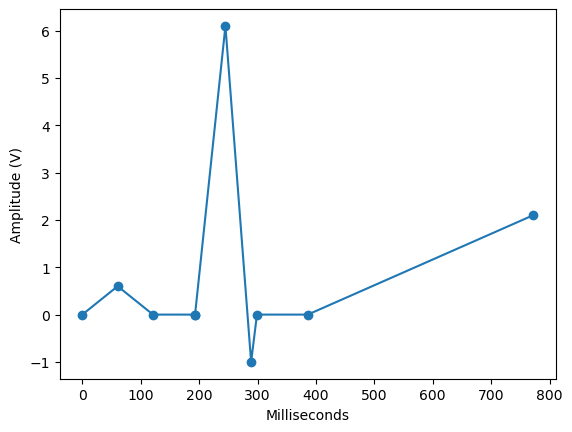

In [112]:
plt.plot(wf['Milliseconds'], wf['Amplitude'], '-o')
plt.xlabel("Milliseconds")
plt.ylabel("Amplitude (V)")
plt.show()

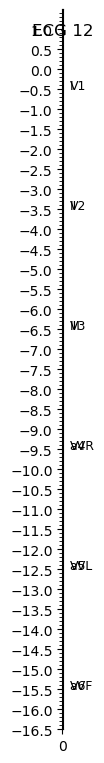

In [113]:
import ecg_plot
import numpy as np

ecg = np.zeros((12,1))
for i in range(1):
    for j in range(1):
        ecg[i][j] = np.random.randint(-3,3)

#ecg = load_data() # load data should be implemented by yourself 
ecg_plot.plot(ecg, sample_rate = 500, title = 'ECG 12')
#ecg_plot.xticks(rotation=90)
ecg_plot.show()

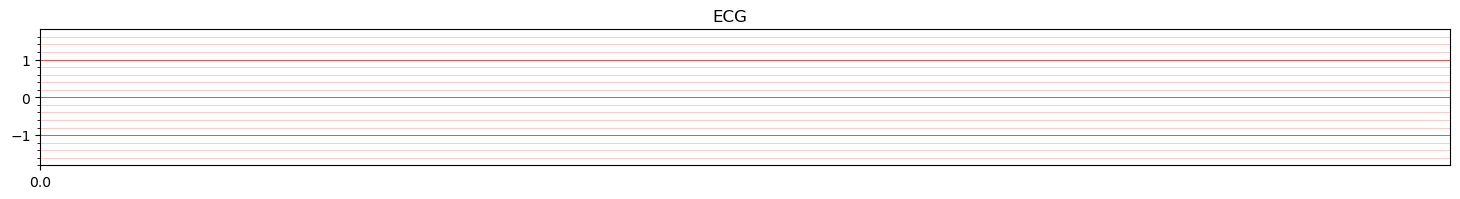

In [114]:
ecg_plot.plot_1(ecg[0], sample_rate=500, title = 'ECG')
ecg_plot.show()

In [115]:
names = list(df.columns)
names

['Age',
 'Sex',
 'Height',
 'Weight',
 'QRS_duration',
 'P-R_interval',
 'Q-T_interval',
 'T_interval',
 'P_interval',
 'QRS_vector_angle',
 'T_vector_angle',
 'P_vector_angle',
 'QRST_vector_angle',
 'J_vector_angle',
 'Heart_rate',
 'DI_Q_wave',
 'DI_R_wave',
 'DI_S_wave',
 "DI_R'_wave",
 "DI_S'_wave",
 'DI_Number_of_intrinsic_deflections',
 'DI_Existence_of_ragged_R_wave',
 'DI_Existence_of_diphasic_derivation_of_R_wave',
 'DI_Existence_of_ragged_P_wave',
 'DI_Existence_of_diphasic_derivation_of_P_wave',
 'DI_Existence_of_ragged_T_wave',
 'DI_Existence_of_diphasic_derivation_of_T_wave',
 'DII_Q_wave',
 'DII_R_wave',
 'DII_S_wave',
 "DII_R'_wave",
 "DII_S'_wave",
 'DII_Number_of_intrinsic_deflections',
 'DII_Existence_of_ragged_R_wave',
 'DII_Existence_of_diphasic_derivation_of_R_wave',
 'DII_Existence_of_ragged_P_wave',
 'DII_Existence_of_diphasic_derivation_of_P_wave',
 'DII_Existence_of_ragged_T_wave',
 'DII_Existence_of_diphasic_derivation_of_T_wave',
 'DIII_Q_wave',
 'DIII_R_wav

<AxesSubplot:xlabel='Rhythm', ylabel='count'>

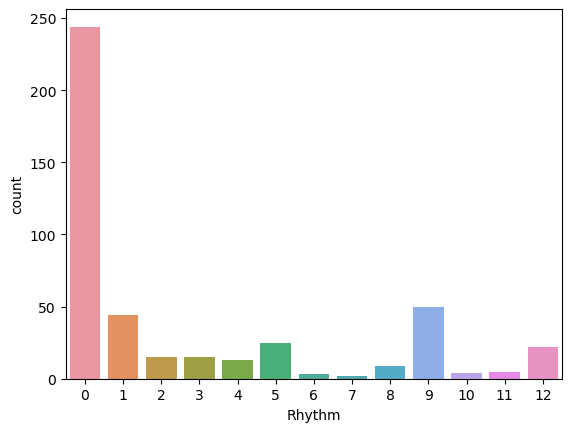

In [116]:
sns.countplot(x='Rhythm', data=df)

In [117]:
cols = df['Rhythm'].value_counts(ascending=False)
cols

0     244
9      50
1      44
5      25
12     22
2      15
3      15
4      13
8       9
11      5
10      4
6       3
7       2
Name: Rhythm, dtype: int64

In [16]:
df.shape

(452, 280)

In [40]:
# find and eliminate correlated columns in the data
def correlated(dataset, threshold=0.8):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

cor_cols = correlated(df,0.8)
print(cor_cols)

#df = df.drop(labels=cor_cols,axis=1)
#df.head()

["DII_Amplitude_S'", "V6_Amplitude_R'", 'AVF_Amplitude_QRSTA', 'V6_Number_of_intrinsic_deflections', 'AVF_Amplitude_S', 'V4_Amplitude_S', 'V6_Amplitude_JJ', 'V1_Amplitude_Q', 'V2_Amplitude_Q', 'AVF_Amplitude_R', 'V4_Amplitude_JJ', "V5_Amplitude_R'", 'V6_Amplitude_T', 'AVL_Amplitude_R', 'V6_Amplitude_QRSA', "DI_Amplitude_R'", 'AVR_Amplitude_S', "DII_Amplitude_R'", "DIII_Amplitude_S'", 'AVL_Amplitude_QRSTA', 'V3_Amplitude_R', 'V4_Amplitude_Q', 'AVL_Amplitude_QRSA', 'AVF_Amplitude_P', 'V5_Amplitude_QRSTA', 'V6_Amplitude_Q', "V4_Amplitude_R'", "V4_Amplitude_S'", 'AVL_Amplitude_Q', "AVR_Amplitude_S'", 'V6_Amplitude_R', "V3_Amplitude_S'", 'AVR_Number_of_intrinsic_deflections', 'DIII_Amplitude_QRSTA', 'AVL_Amplitude_T', 'V5_Amplitude_Q', 'V6_Amplitude_S', "AVL_Amplitude_R'", 'V5_Amplitude_P', 'V1_S_wave', 'AVF_Amplitude_QRSA', 'DII_Amplitude_Q', "AVF_Amplitude_R'", 'DI_Amplitude_Q', 'V6_Amplitude_P', 'AVR_Amplitude_QRSTA', 'V3_Number_of_intrinsic_deflections', 'V6_Q_wave', "V2_Amplitude_S'", 

<Figure size 1000x1000 with 0 Axes>

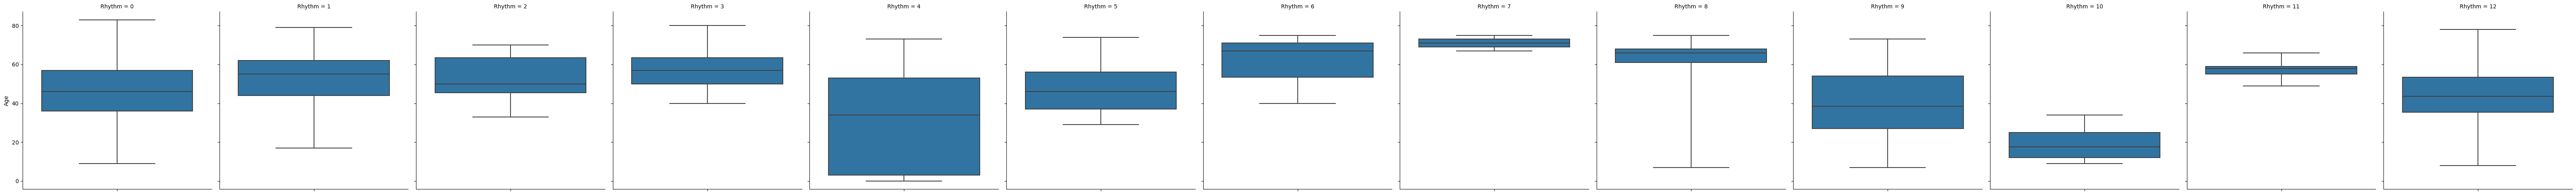

In [42]:
fig = plt.figure(1, figsize=(10,10))
sns.catplot(y='Age', data=df, kind='box', whis=[0,100], col='Rhythm')
plt.show()

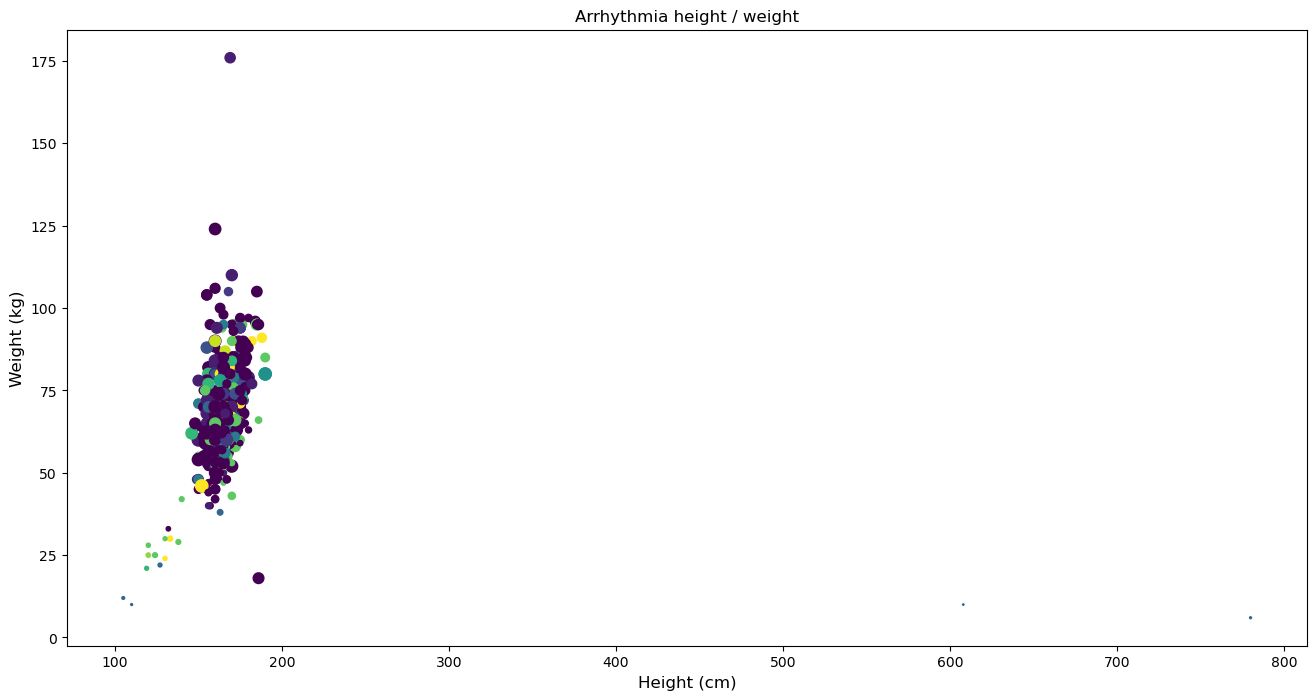

In [43]:
# looking for anomalies in height and weight
def plotArrhythmia():
    plt.figure(figsize=(16,8))
    plt.title('Arrhythmia height / weight')
    plt.scatter(x=df['Height'], y=df['Weight'], c=df['Rhythm'], s=(1+df['Age']))
    plt.xlabel('Height (cm)', fontsize=12)
    plt.ylabel('Weight (kg)', fontsize=12)
    #plt.legend(arrhythmia['Arrhythmia'])
    plt.show()

plotArrhythmia()

In [44]:
# show the rows with heights > 600
df.loc[df['Height'] > 600]

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P interval,QRS_vector_angle,...,V6_Amplitude_Q,V6_Amplitude_R,V6_Amplitude_S,V6_Amplitude_R',V6_Amplitude_S',V6_Amplitude_P,V6_Amplitude_T,V6_Amplitude_QRSA,V6_Amplitude_QRSTA,Rhythm
141,1,1,780,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0.0,1.3,0.7,2.7,5.5,4
316,0,0,608,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0.0,0.5,2.5,-11.8,1.7,4


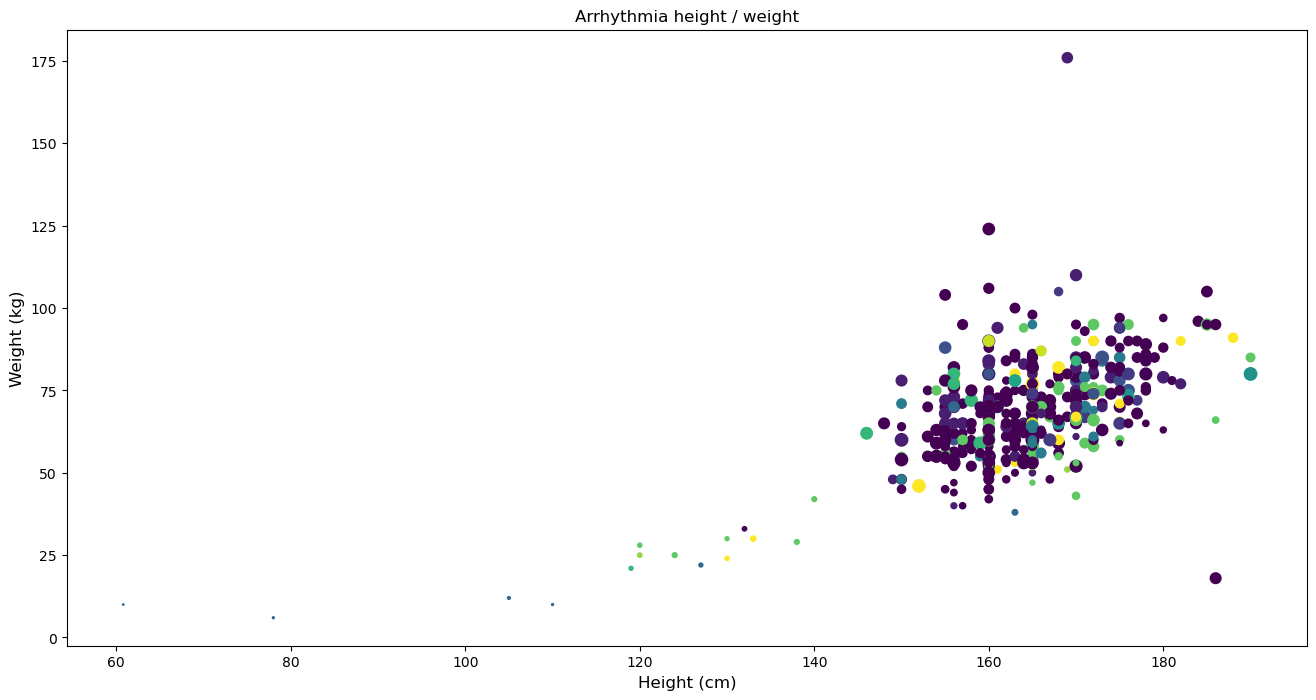

In [45]:
# by their age, both are clearly babies / toddlers
df.at[141, 'Height'] = 78.0
df.at[316, 'Height'] = 60.8
df.iloc[141]['Height'], df.iloc[316]['Height']
# re-run the scatter plot
plotArrhythmia()

In [46]:
# show the rows with weights < 20
df.loc[df['Weight'] < 20]

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P interval,QRS_vector_angle,...,V6_Amplitude_Q,V6_Amplitude_R,V6_Amplitude_S,V6_Amplitude_R',V6_Amplitude_S',V6_Amplitude_P,V6_Amplitude_T,V6_Amplitude_QRSA,V6_Amplitude_QRSTA,Rhythm
60,1,0,110.0,10,80,121,287,156,67,126,...,-0.5,5.1,-4.8,0.0,0.0,0.8,0.9,-1.8,5.2,4
126,58,0,186.0,18,87,166,372,150,96,-1,...,-0.8,6.3,-2.9,0.0,0.0,0.7,1.4,5.7,15.7,0
141,1,1,78.0,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0.0,1.3,0.7,2.7,5.5,4
316,0,0,60.8,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0.0,0.5,2.5,-11.8,1.7,4
320,3,0,105.0,12,69,155,240,133,64,93,...,0.0,3.3,0.0,0.0,0.0,1.1,-0.1,5.9,5.4,4


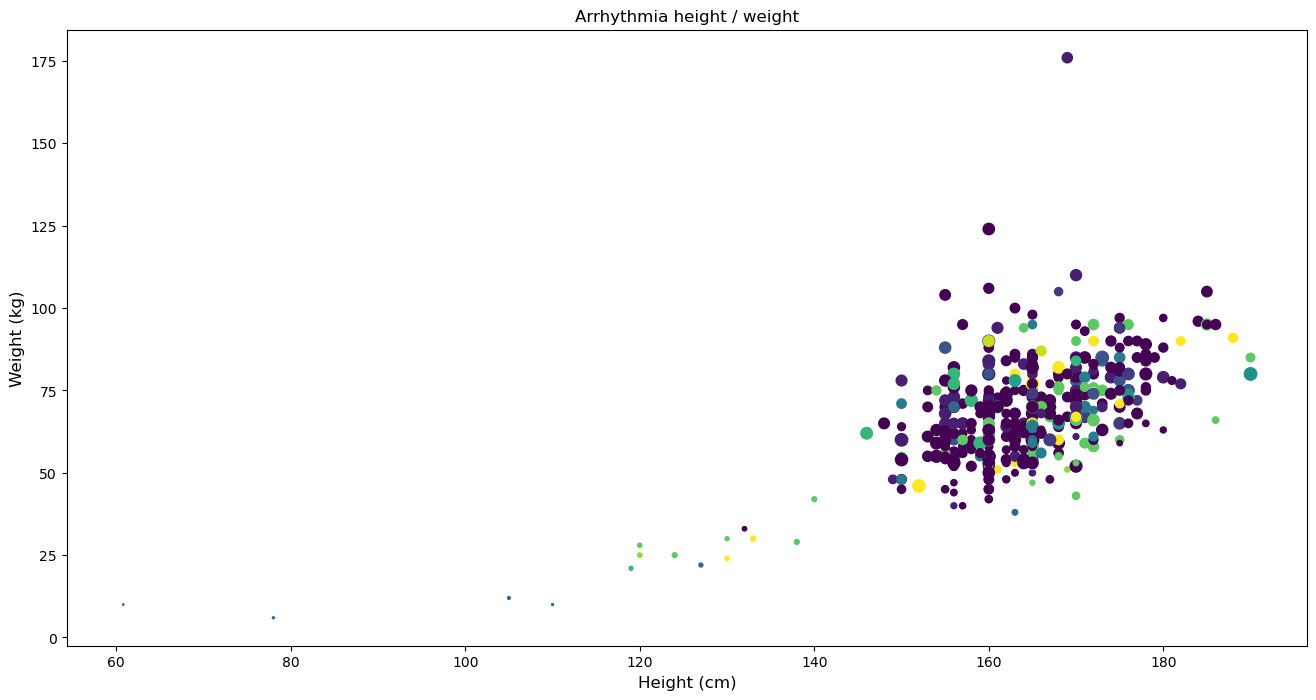

In [47]:
# 58 year old female 186 high, weighing in at only 18kg ??? - and who has a normal heart rhythm???
#arrhythmia.at[126, 'Weight'] = 78.0
df = df.drop(index=126,axis=0)
# re-run the scatter plot
plotArrhythmia()

In [48]:
# show the very heavy individual - shows a 53 yr old female - with coronary artery disease - typo?
df.loc[df['Weight'] > 170]

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P interval,QRS_vector_angle,...,V6_Amplitude_Q,V6_Amplitude_R,V6_Amplitude_S,V6_Amplitude_R',V6_Amplitude_S',V6_Amplitude_P,V6_Amplitude_T,V6_Amplitude_QRSA,V6_Amplitude_QRSTA,Rhythm
213,53,0,169.0,176,111,166,339,200,100,86,...,-1.0,12.4,0.0,0.0,0.0,0.8,1.5,31.0,44.2,1


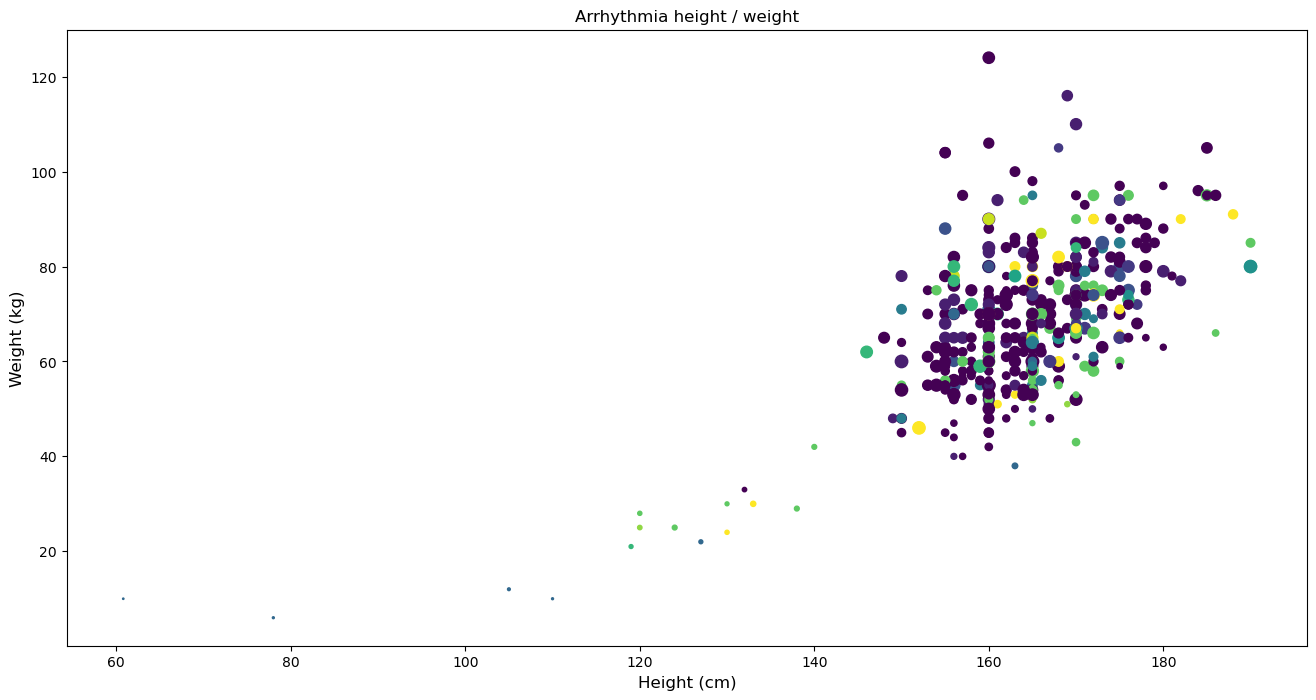

In [49]:
# let's assume that that is a transcription error from handwritten notes
df.at[213, 'Weight'] = 116.0
# re-run the scatter plot
plotArrhythmia()

In [50]:
df.to_csv('C:/Users/user/ML/arrhythmia/arrhythmia.cleaned.csv', index=False)

In [51]:
df = pd.read_csv('C:/Users/user/ML/arrhythmia/arrhythmia.cleaned.csv')

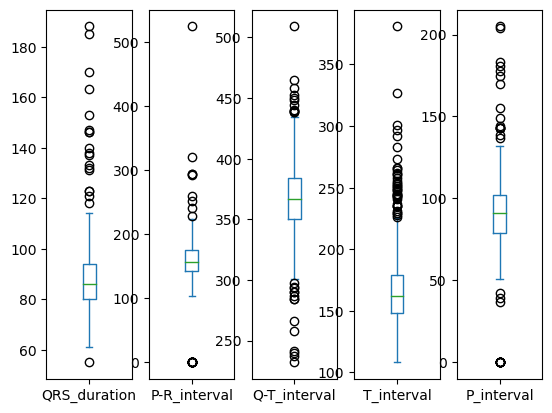

In [54]:
# Make a list of the column names to be plotted: cols
cols = ['QRS_duration','P-R_interval','Q-T_interval','T_interval','P_interval']

# Generate the box plots
df[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

<Figure size 1600x800 with 0 Axes>

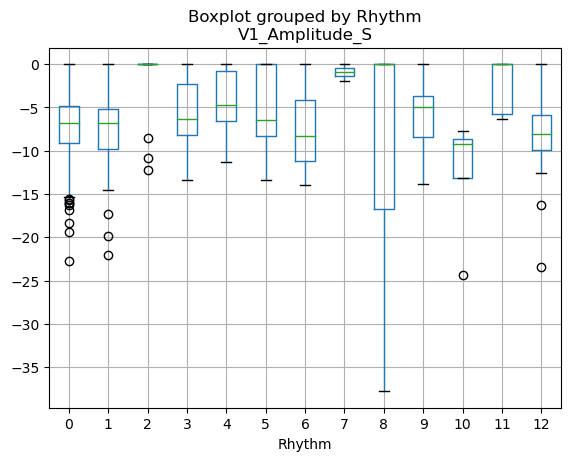

In [56]:
fig = plt.figure(1, figsize=(16, 8))
df.boxplot(column='V1_Amplitude_S', by='Rhythm')
plt.show()

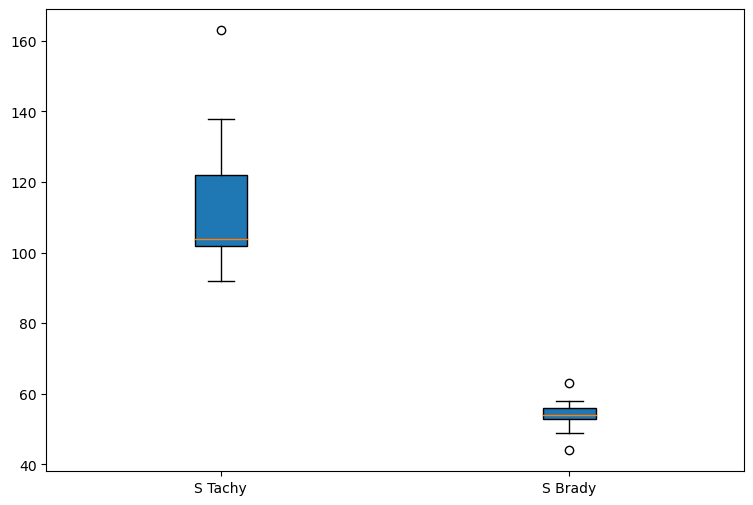

In [58]:
# sinus tachycardia & bradycardia
# https://en.wikipedia.org/wiki/Sinus_tachycardia
sinus_tachy = df.loc[df['Rhythm'] == 4]
sinus_brady = df.loc[df['Rhythm'] == 5]
                            
s_tachy = np.array(sinus_tachy['Heart_rate'])
s_brady = np.array(sinus_brady['Heart_rate'])

# expect tachy to have HR > 100, brady < 60
all_data = [s_tachy, s_brady]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(all_data,patch_artist=True,labels=['S Tachy','S Brady'])

plt.show()

In [ ]:
# simple randomised over sampling
# https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

In [59]:
# split into data and classes
X = df.iloc[:, 0:-1].values
x = df.iloc[:, 0:-1].columns
y = df.iloc[:, -1].values
y

array([ 7,  5,  9,  0,  6, 10,  0,  0,  0,  9,  2,  0,  9,  5,  0,  0,  9,
        0,  0,  0,  0,  0,  0,  0,  0, 12, 10,  9,  1,  1,  5,  0,  0,  0,
        3,  0,  0,  9,  0,  5,  0,  0,  0,  0,  0,  3,  4,  0,  5,  0,  0,
        0,  9, 12, 12,  5,  0,  0,  5,  0,  4,  4,  0,  0,  0,  0,  1,  0,
        5,  0,  5, 12,  0,  0,  0,  9,  2,  1,  0,  0,  0,  0,  1,  3,  5,
        8,  1,  3,  8,  8,  0,  3,  0,  4,  9,  0,  9,  0,  0,  0,  3,  0,
        0,  0,  5,  3,  5,  0,  1,  0,  0,  0,  0,  0,  5,  0, 12,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  9,  0,  0,
        9,  0,  0,  0,  4,  0,  0,  9,  9,  9,  0,  0,  9,  0,  0,  0,  5,
       12,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  3,  0,
        0,  0,  9, 11,  5,  0,  0,  0,  1,  0, 12,  0,  3,  1,  3,  1,  1,
       10,  8,  0,  0,  1,  1,  0,  0,  0, 12, 12,  0,  1,  0,  0,  0,  2,
        0,  0,  8,  0,  9,  9,  0,  1,  1,  3,  0,  1, 11,  2, 12,  0,  0,
        5,  0,  9,  2,  0

In [60]:
# scale the data assuming that there will be outliers in the data 
from sklearn import preprocessing
#X = preprocessing.robust_scale(X)
X = preprocessing.scale(X)

In [61]:
# training test set split - 80% being used to train and (default) ensuring even stratification of output in test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
y_test

array([ 9,  0, 12,  0,  0,  0,  0,  1,  0,  0,  2,  4, 11,  0,  0,  1,  9,
        0,  4,  0,  0,  5,  0,  0, 10,  1,  0,  1,  1,  9,  0, 12,  3,  4,
        5,  0,  2,  1,  8,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,
        8,  0,  0,  6,  2,  5,  0,  9,  5,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  9,  1,  9,  5,  0,  0,  9,  9,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  9, 12, 12,  9], dtype=int64)

In [62]:
X_train.shape

(360, 279)

In [63]:
for i in range(13):
    print(i, list(y_train).count(i))

0 195
1 35
2 12
3 12
4 10
5 20
6 2
7 2
8 7
9 40
10 3
11 4
12 18


In [65]:
# check version number
import imblearn
print(imblearn.__version__)

0.11.0


In [66]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

In [80]:
oversample = True
if oversample:

    # instantiating the random over sampler 
    randomoversample = RandomOverSampler(sampling_strategy={0:195, 1:100, 2:100, 3:100, 4:100, 5:100, 6:100, 7:100, 8:100, 9:100, 10:100, 11:100, 12:100})
    # resampling X, y
    X_ros, y_ros = randomoversample.fit_resample(X_train, y_train)
    
    X_train = X_ros
    y_train = y_ros

In [92]:
undersample = True
if undersample:

    # instantiating the random over sampler 
    #undersample = RandomUnderSampler(sampling_strategy={0:200, 1:100, 2:100, 3:100, 4:100, 5:100, 6:100, 7:100, 8:100, 9:100, 10:100, 11:100, 12:100})

    undersample = CondensedNearestNeighbour(sampling_strategy='majority', n_seeds_S=100)

    # resampling X, y
    X_rus, y_rus = undersample.fit_resample(X_train, y_train)
    
    X_train = X_rus
    y_train = y_rus

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [93]:
for i in range(13):
    print(i, list(y_train).count(i))

0 109
1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100


In [94]:
df.columns.to_list()

['Age',
 'Sex',
 'Height',
 'Weight',
 'QRS_duration',
 'P-R_interval',
 'Q-T_interval',
 'T_interval',
 'P_interval',
 'QRS_vector_angle',
 'T_vector_angle',
 'P_vector_angle',
 'QRST_vector_angle',
 'J_vector_angle',
 'Heart_rate',
 'DI_Q_wave',
 'DI_R_wave',
 'DI_S_wave',
 "DI_R'_wave",
 "DI_S'_wave",
 'DI_Number_of_intrinsic_deflections',
 'DI_Existence_of_ragged_R_wave',
 'DI_Existence_of_diphasic_derivation_of_R_wave',
 'DI_Existence_of_ragged_P_wave',
 'DI_Existence_of_diphasic_derivation_of_P_wave',
 'DI_Existence_of_ragged_T_wave',
 'DI_Existence_of_diphasic_derivation_of_T_wave',
 'DII_Q_wave',
 'DII_R_wave',
 'DII_S_wave',
 "DII_R'_wave",
 "DII_S'_wave",
 'DII_Number_of_intrinsic_deflections',
 'DII_Existence_of_ragged_R_wave',
 'DII_Existence_of_diphasic_derivation_of_R_wave',
 'DII_Existence_of_ragged_P_wave',
 'DII_Existence_of_diphasic_derivation_of_P_wave',
 'DII_Existence_of_ragged_T_wave',
 'DII_Existence_of_diphasic_derivation_of_T_wave',
 'DIII_Q_wave',
 'DIII_R_wav

In [95]:
n = df.shape[1]-1
n

279

In [96]:
# number of classes
K = np.max(y_train)+1
print('num classes =', K)

num classes = 13


In [97]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(50,input_shape=(n,), activation='relu'))

model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.ActivityRegularization(l2=0.05))

model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.ActivityRegularization(l2=0.05))

model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.ActivityRegularization(l2=0.05))

model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(K, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [98]:
# fit model over 200 epochs
h = model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
37/37 [==============================] - 1s 7ms/step - loss: 3.4012 - accuracy: 0.1282 - val_loss: 2.7344 - val_accuracy: 0.0000e+00
Epoch 2/200
37/37 [==============================] - 0s 2ms/step - loss: 2.6234 - accuracy: 0.1689 - val_loss: 2.7200 - val_accuracy: 0.0000e+00
Epoch 3/200
37/37 [==============================] - 0s 2ms/step - loss: 2.5388 - accuracy: 0.1825 - val_loss: 2.7651 - val_accuracy: 0.0000e+00
Epoch 4/200
37/37 [==============================] - 0s 2ms/step - loss: 2.4838 - accuracy: 0.1842 - val_loss: 2.8141 - val_accuracy: 0.0000e+00
Epoch 5/200
37/37 [==============================] - 0s 2ms/step - loss: 2.4457 - accuracy: 0.2250 - val_loss: 2.8912 - val_accuracy: 0.0000e+00
Epoch 6/200
37/37 [==============================] - 0s 2ms/step - loss: 2.4031 - accuracy: 0.2581 - val_loss: 2.9932 - val_accuracy: 0.0000e+00
Epoch 7/200
37/37 [==============================] - 0s 2ms/step - loss: 2.3380 - accuracy: 0.3132 - val_loss: 3.1157 - val_accura

37/37 [==============================] - 0s 2ms/step - loss: 0.8341 - accuracy: 0.7428 - val_loss: 5.7643 - val_accuracy: 0.0000e+00
Epoch 58/200
37/37 [==============================] - 0s 2ms/step - loss: 0.8411 - accuracy: 0.7496 - val_loss: 5.7450 - val_accuracy: 0.0000e+00
Epoch 59/200
37/37 [==============================] - 0s 3ms/step - loss: 0.8276 - accuracy: 0.7470 - val_loss: 5.6458 - val_accuracy: 0.0000e+00
Epoch 60/200
37/37 [==============================] - 0s 2ms/step - loss: 0.8431 - accuracy: 0.7436 - val_loss: 5.6546 - val_accuracy: 0.0000e+00
Epoch 61/200
37/37 [==============================] - 0s 3ms/step - loss: 0.8106 - accuracy: 0.7419 - val_loss: 5.6513 - val_accuracy: 0.0000e+00
Epoch 62/200
37/37 [==============================] - 0s 2ms/step - loss: 0.8300 - accuracy: 0.7411 - val_loss: 5.7511 - val_accuracy: 0.0000e+00
Epoch 63/200
37/37 [==============================] - 0s 2ms/step - loss: 0.8153 - accuracy: 0.7343 - val_loss: 5.9549 - val_accuracy: 0.

37/37 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.7589 - val_loss: 6.5912 - val_accuracy: 0.0000e+00
Epoch 114/200
37/37 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.7623 - val_loss: 6.5430 - val_accuracy: 0.0000e+00
Epoch 115/200
37/37 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.7606 - val_loss: 6.4852 - val_accuracy: 0.0000e+00
Epoch 116/200
37/37 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.7513 - val_loss: 6.5746 - val_accuracy: 0.0000e+00
Epoch 117/200
37/37 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.7555 - val_loss: 6.5937 - val_accuracy: 0.0000e+00
Epoch 118/200
37/37 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.7521 - val_loss: 6.5883 - val_accuracy: 0.0000e+00
Epoch 119/200
37/37 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.7666 - val_loss: 6.6621 - val_accura

Epoch 169/200
37/37 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7615 - val_loss: 7.3205 - val_accuracy: 0.0000e+00
Epoch 170/200
37/37 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.7657 - val_loss: 7.2932 - val_accuracy: 0.0000e+00
Epoch 171/200
37/37 [==============================] - 0s 2ms/step - loss: 0.6045 - accuracy: 0.7683 - val_loss: 7.4082 - val_accuracy: 0.0000e+00
Epoch 172/200
37/37 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7767 - val_loss: 7.4392 - val_accuracy: 0.0000e+00
Epoch 173/200
37/37 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.7699 - val_loss: 7.4163 - val_accuracy: 0.0000e+00
Epoch 174/200
37/37 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7581 - val_loss: 7.4090 - val_accuracy: 0.0000e+00
Epoch 175/200
37/37 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.7581 - val_loss: 7.379

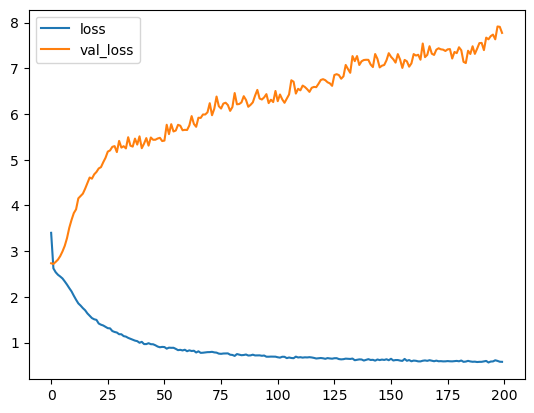

In [99]:
plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

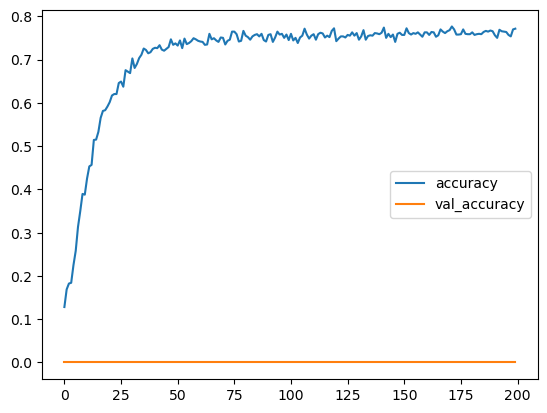

In [100]:
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

3/3 [==============================] - 0s 8ms/step
unnormalized confusion matrix


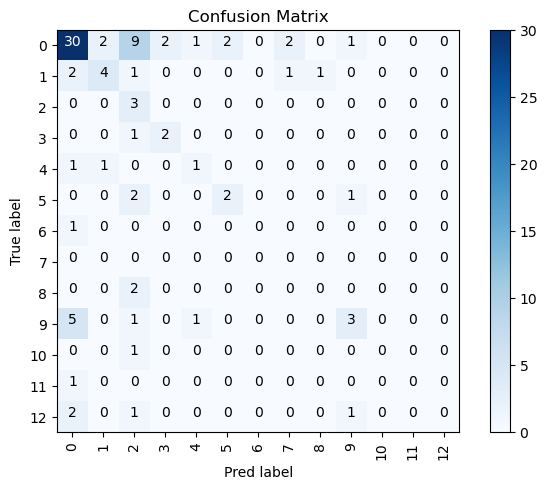

In [102]:
# plot a multiclass confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,
                         classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    
    """
    This function builds and plots a multiclass confusion matrix
    Normalisation can be applied by setting normalization=True
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('nomalized confusion matrix')
    else:
        print('unnormalized confusion matrix')
        
    #print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tickmarks = np.arange(len(classes))
    plt.xticks(tickmarks, classes, rotation=90)
    plt.yticks(tickmarks, classes)
    
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Pred label')
    plt.show()
    
y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, list(range(K)))

C:\Users\user\AppData\Local\Temp\ipykernel_5976\726974684.py:17: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


nomalized confusion matrix


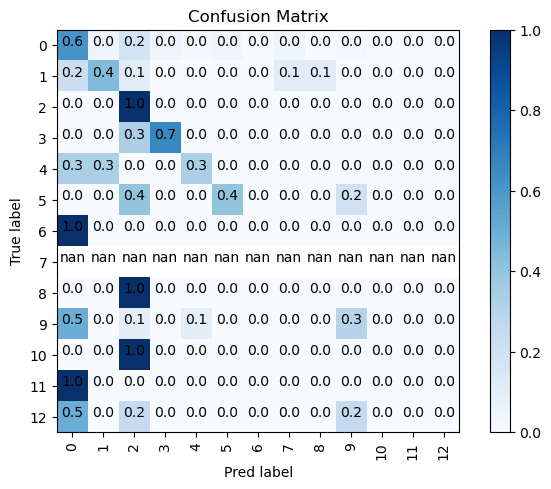

In [103]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=cm, classes=list(range(K)), normalize=True)

In [91]:
# what are the results?
print('Accuracy : %.3f' % accuracy_score(y_pred, y_test))
print('Balanced Accuracy : %.3f' % balanced_accuracy_score(y_pred, y_test))
print('Error    : %.3f' % (1 - accuracy_score(y_pred, y_test)))
print('Precision: %.3f' % precision_score(y_pred, y_test, average='weighted'))
print('Recall   : %.3f' % recall_score(y_pred, y_test, average='weighted', zero_division='warn'))

Accuracy : 0.516
Balanced Accuracy : 0.500
Error    : 0.484
Precision: 0.594
Recall   : 0.516


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
